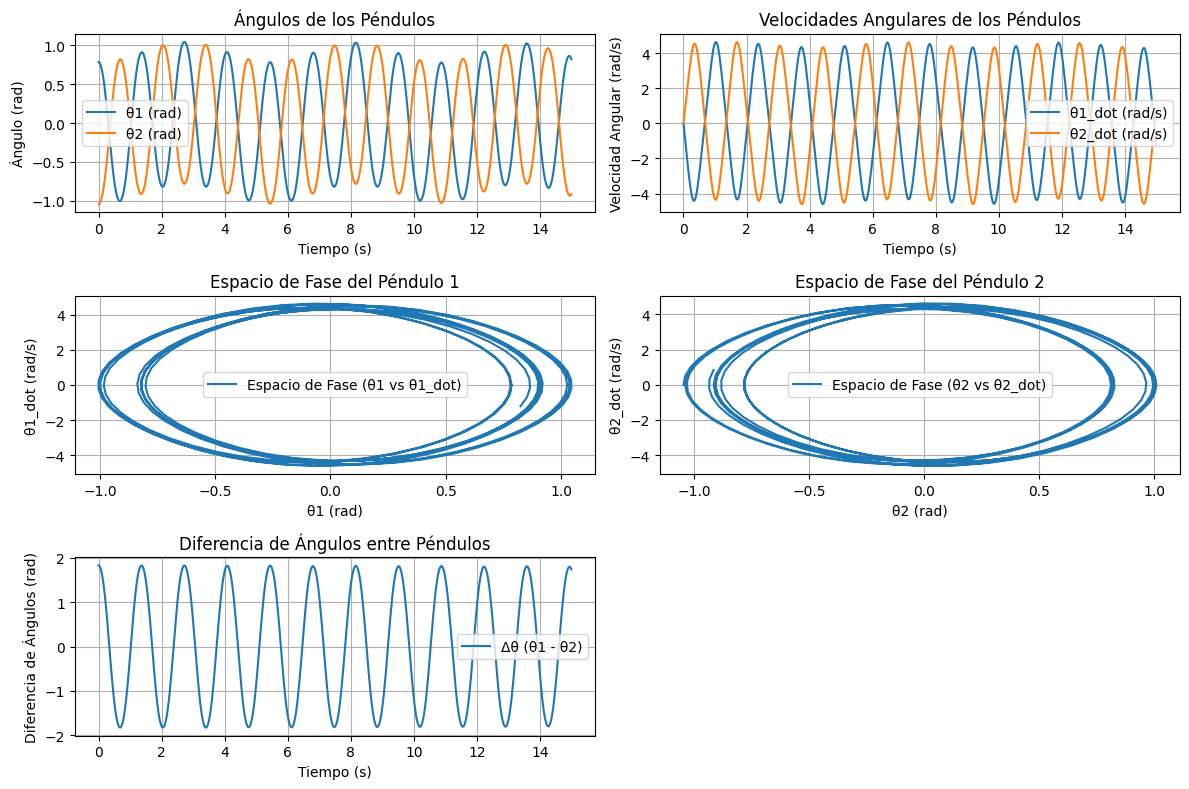

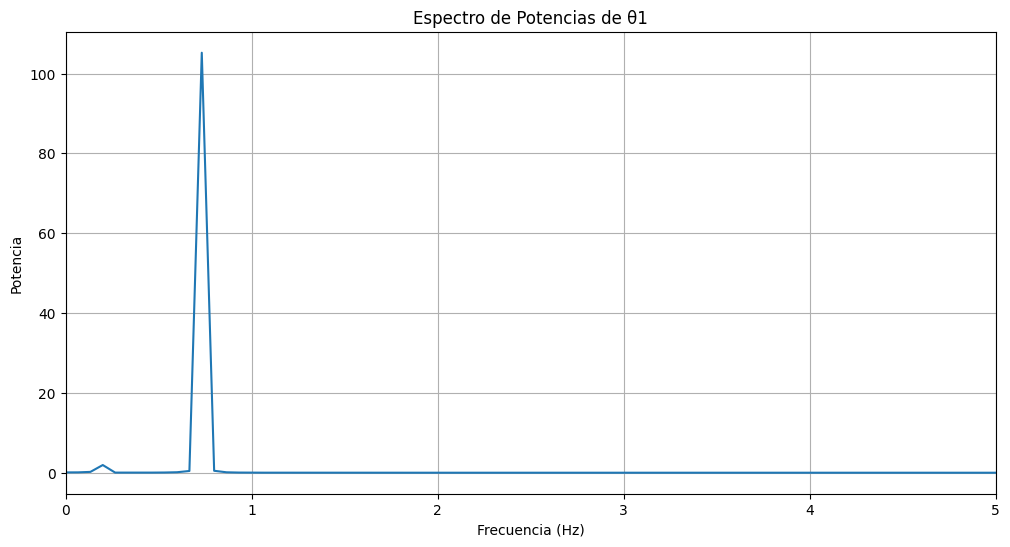

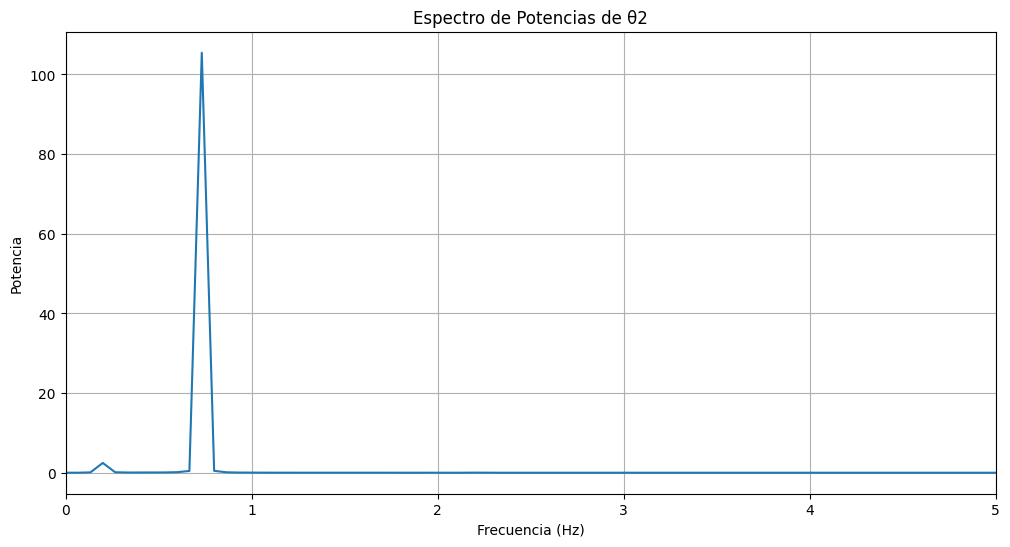

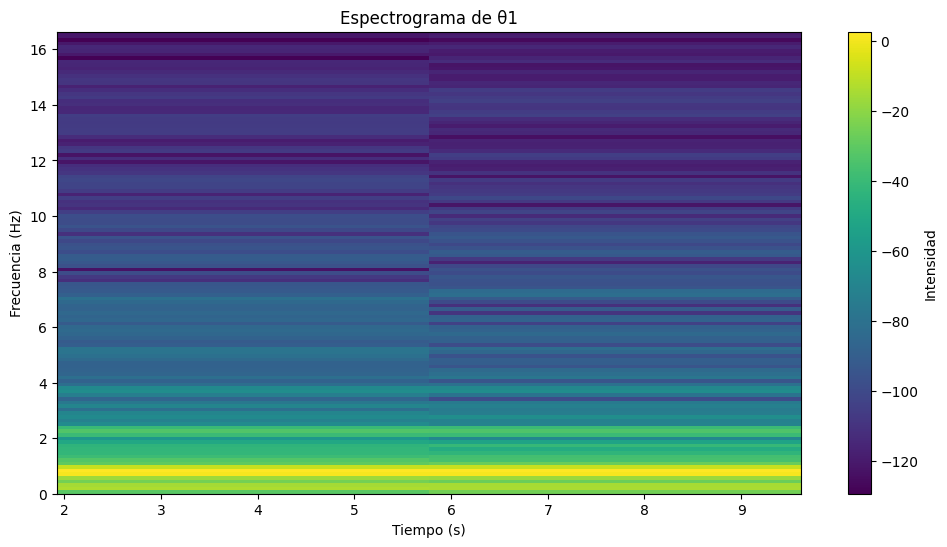

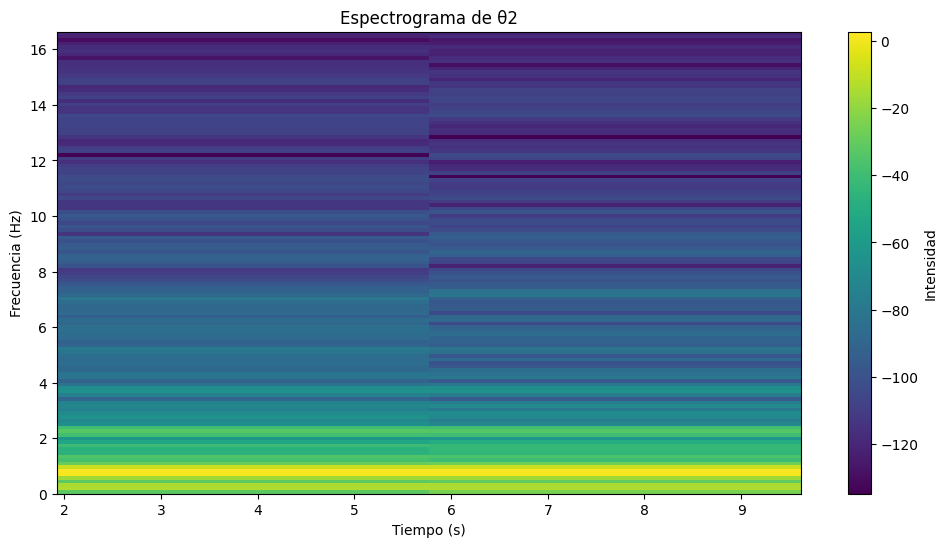

'\n# Configuración de la figura y los ejes para la animación\nfig, ax = plt.subplots()\nax.set_xlim(-2, 2)\nax.set_ylim(-2, 2)\nax.set_aspect(\'equal\')\n\n# Dibujando los péndulos y sus brazos por separado\nline1, = ax.plot(\n  \n  [], [], \'o-\', lw=2, color=\'blue\', label=\'Péndulo 1\')\nline2, = ax.plot([], [], \'o-\', lw=2, color=\'red\', label=\'Péndulo 2\')\nspring, = ax.plot([], [], \'g-\', lw=2)  # Línea del resorte\ntime_template = \'Time = %.1fs\'\ntime_text = ax.text(0.05, 0.9, \'\', transform=ax.transAxes)\n\n# Función de inicialización para la animación\ndef init():\n    line1.set_data([], [])\n    line2.set_data([], [])\n    spring.set_data([], [])  # Inicializar el resorte\n    time_text.set_text(\'\')\n    return line1, line2, spring, time_text\n\n# Función de actualización \ndef update(frame):\n    # Actualizando el péndulo 1\n    line1.set_data([separation, x1[frame]], [0, y1[frame]])\n    # Actualizando el péndulo 2\n    line2.set_data([-separation, x2[frame]], [0,

In [31]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Parámetros del sistema
m1 = 1.0
m2 = 1.0
l1 = 1.0
l2 = 1.0
g = 9.81
k = 10.0
separation = 0.8 # separacion la parte inmovil del pendulo

# Ecuaciones diferenciales del sistema
def pendulum_system(t, y):
    θ1, θ1_dot, θ2, θ2_dot = y
    θ1_ddot = (-m1 * g * l1 * np.sin(θ1) - k * np.cos(θ1) * l1 * (l1 * np.sin(θ1) - l2 * np.sin(θ2))) / (m1 * l1**2)
    θ2_ddot = (-m2 * g * l2 * np.sin(θ2) + k * np.cos(θ2) * l1 * (l1 * np.sin(θ1) - l2 * np.sin(θ2))) / (m2 * l2**2)
    return [θ1_dot, θ1_ddot, θ2_dot, θ2_ddot]

# Condiciones iniciales
θ1_0 = np.pi / 4
θ1_dot_0 = 0.0
θ2_0 = -np.pi / 3
θ2_dot_0 = 0.0
y0 = [θ1_0, θ1_dot_0, θ2_0, θ2_dot_0]

# Intervalo de tiempo
t_span = (0, 15)
t_eval = np.linspace(t_span[0], t_span[1], 500)

#Se guardan las soluciones
sol = solve_ivp(pendulum_system, t_span, y0, t_eval=t_eval, vectorized=True)

# Posiciones de los péndulos en función del tiempo
x1 = separation + l1 * np.sin(sol.y[0])
y1 = -l1 * np.cos(sol.y[0])
x2 = -separation + l2 * np.sin(sol.y[2])
y2 = -l2 * np.cos(sol.y[2])

# Gráficas de los resultados
plt.figure(figsize=(12, 8))

# Ángulos
plt.subplot(3, 2, 1)
plt.plot(sol.t, sol.y[0], label='θ1 (rad)')
plt.plot(sol.t, sol.y[2], label='θ2 (rad)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Ángulos de los Péndulos')
plt.legend()
plt.grid()

# Velocidades angulares
plt.subplot(3, 2, 2)
plt.plot(sol.t, sol.y[1], label='θ1_dot (rad/s)')
plt.plot(sol.t, sol.y[3], label='θ2_dot (rad/s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidades Angulares de los Péndulos')
plt.legend()
plt.grid()

# Espacio de fase del primer péndulo
plt.subplot(3, 2, 3)
plt.plot(sol.y[0], sol.y[1], label='Espacio de Fase (θ1 vs θ1_dot)')
plt.xlabel('θ1 (rad)')
plt.ylabel('θ1_dot (rad/s)')
plt.title('Espacio de Fase del Péndulo 1')
plt.legend()
plt.grid()

# Espacio de fase del segundo péndulo
plt.subplot(3, 2, 4)
plt.plot(sol.y[2], sol.y[3], label='Espacio de Fase (θ2 vs θ2_dot)')
plt.xlabel('θ2 (rad)')
plt.ylabel('θ2_dot (rad/s)')
plt.title('Espacio de Fase del Péndulo 2')
plt.legend()
plt.grid()

# Gráfico de diferencia de ángulos
plt.subplot(3, 2, 5)
plt.plot(sol.t, sol.y[0] - sol.y[2], label='Δθ (θ1 - θ2)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Diferencia de Ángulos (rad)')
plt.title('Diferencia de Ángulos entre Péndulos')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Análisis del espectro de potencias de Fourier
def plot_power_spectrum(signal, t, label):
    fs = 1 / (t[1] - t[0])  # Frecuencia de muestreo
    n = len(signal)
    freq = np.fft.fftfreq(n, d=t[1] - t[0])
    fft_values = np.fft.fft(signal)
    power_spectrum = np.abs(fft_values)**2 / n

    plt.figure(figsize=(12, 6))
    plt.plot(freq[:n // 2], power_spectrum[:n // 2])
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Potencia')
    plt.xlim(0, 5)
    plt.title(f'Espectro de Potencias de {label}')
    plt.grid()
    plt.show()

plot_power_spectrum(sol.y[0], sol.t, 'θ1')
plot_power_spectrum(sol.y[2], sol.t, 'θ2')

# Análisis del espectrograma
def plot_spectrogram(signal, t, label):
    plt.figure(figsize=(12, 6))
    plt.specgram(signal, Fs=1 / (t[1] - t[0]), NFFT=256, noverlap=128, cmap='viridis')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia (Hz)')
    plt.title(f'Espectrograma de {label}')
    plt.colorbar(label='Intensidad')
    plt.show()

plot_spectrogram(sol.y[0], sol.t, 'θ1')

plot_spectrogram(sol.y[2], sol.t, 'θ2')
'''
# Configuración de la figura y los ejes para la animación
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')

# Dibujando los péndulos y sus brazos por separado
line1, = ax.plot(

  [], [], 'o-', lw=2, color='blue', label='Péndulo 1')
line2, = ax.plot([], [], 'o-', lw=2, color='red', label='Péndulo 2')
spring, = ax.plot([], [], 'g-', lw=2)  # Línea del resorte
time_template = 'Time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Función de inicialización para la animación
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    spring.set_data([], [])  # Inicializar el resorte
    time_text.set_text('')
    return line1, line2, spring, time_text

# Función de actualización
def update(frame):
    # Actualizando el péndulo 1
    line1.set_data([separation, x1[frame]], [0, y1[frame]])
    # Actualizando el péndulo 2
    line2.set_data([-separation, x2[frame]], [0, y2[frame]])
    # Actualizando el resorte
    spring.set_data([x1[frame], x2[frame]], [y1[frame], y2[frame]])
    time_text.set_text(time_template % (sol.t[frame]))
    return line1, line2, spring, time_text
ani = animation.FuncAnimation(fig, update, frames=len(t_eval),
                              init_func=init, blit=True)


ani.save('/content/pendulos_acoplados_con_resorte.gif', writer='pillow')

HTML('<img src="/content/pendulos_acoplados_con_resorte.gif">')
'''

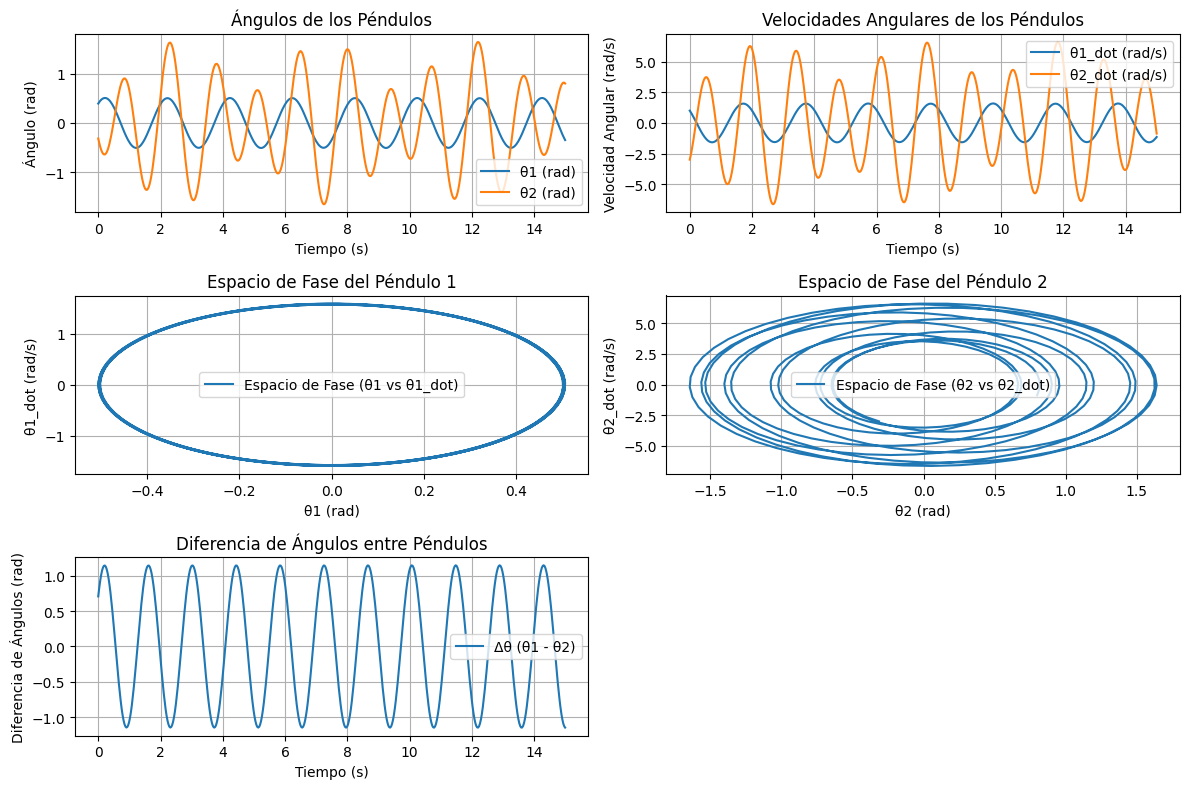

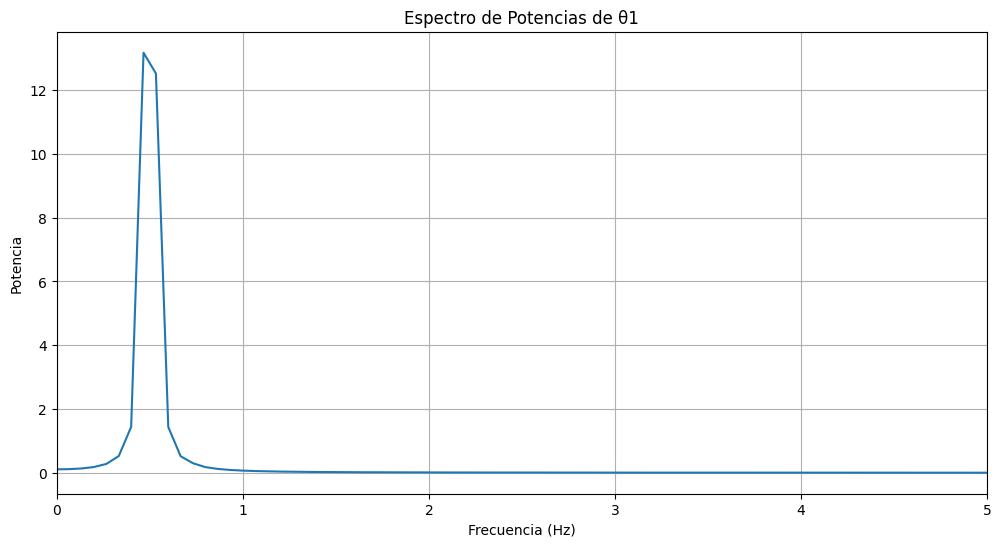

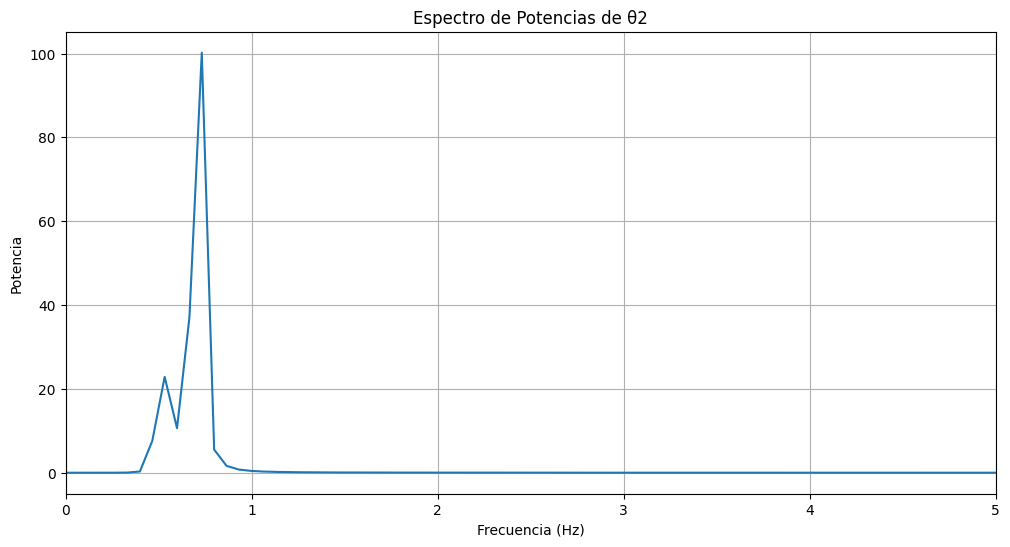

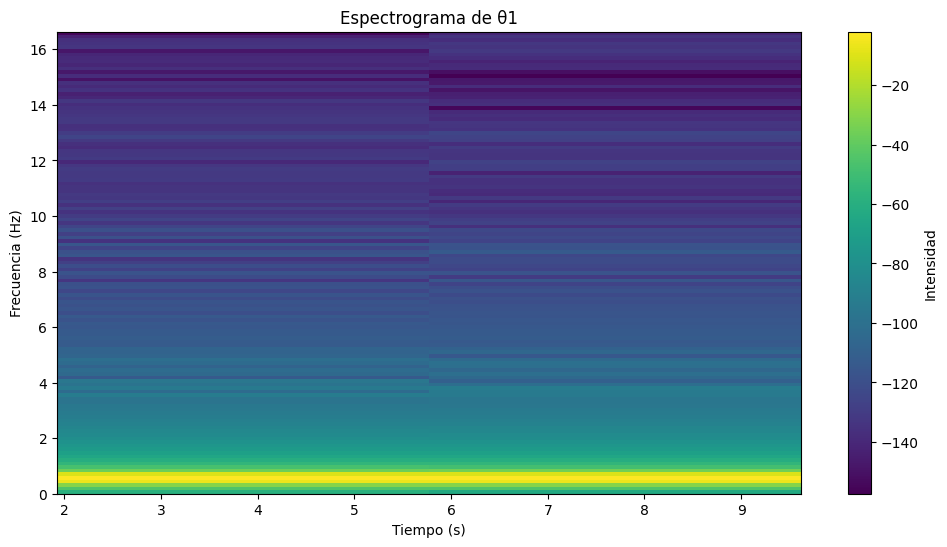

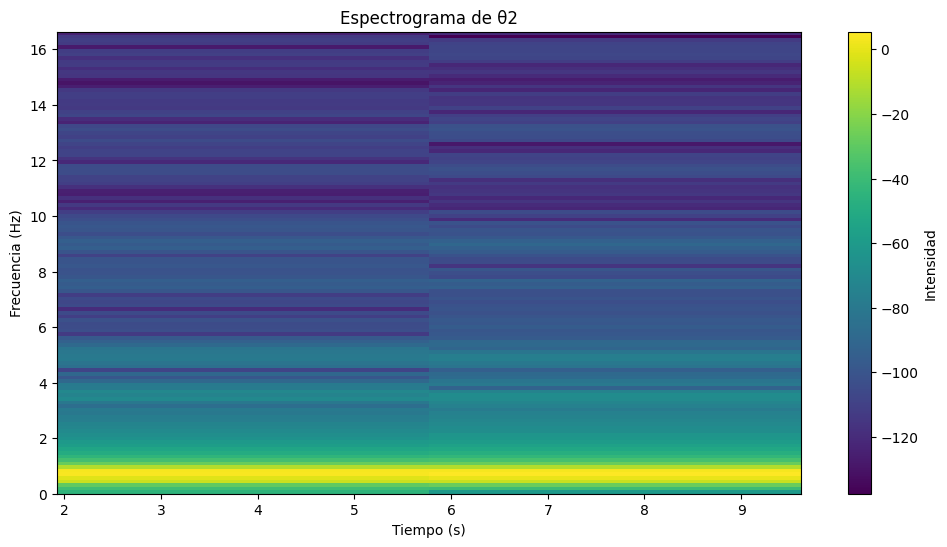

'\n# Configuración de la figura y los ejes para la animación\nfig, ax = plt.subplots()\nax.set_xlim(-2, 2)\nax.set_ylim(-2, 2)\nax.set_aspect(\'equal\')\n\n# Dibujando los péndulos y sus brazos por separado\nline1, = ax.plot(\n  \n  [], [], \'o-\', lw=2, color=\'blue\', label=\'Péndulo 1\')\nline2, = ax.plot([], [], \'o-\', lw=2, color=\'red\', label=\'Péndulo 2\')\nspring, = ax.plot([], [], \'g-\', lw=2)  # Línea del resorte\ntime_template = \'Time = %.1fs\'\ntime_text = ax.text(0.05, 0.9, \'\', transform=ax.transAxes)\n\n# Función de inicialización para la animación\ndef init():\n    line1.set_data([], [])\n    line2.set_data([], [])\n    spring.set_data([], [])  # Inicializar el resorte\n    time_text.set_text(\'\')\n    return line1, line2, spring, time_text\n\n# Función de actualización para la animación\ndef update(frame):\n    # Actualizando el péndulo 1\n    line1.set_data([separation, x1[frame]], [0, y1[frame]])\n    # Actualizando el péndulo 2\n    line2.set_data([-separation

In [34]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Parámetros del sistema
m1 = 555.0
m2 = 1.0
l1 = 1.0
l2 = 1.0
g = 9.81
k = 10.0
separation = 0.8 # separacion la parte inmovil del pendulo

# Ecuaciones diferenciales del sistema
def pendulum_system(t, y):
    θ1, θ1_dot, θ2, θ2_dot = y
    θ1_ddot = (-m1 * g * l1 * θ1 - k * l1*(l1**2 * θ1 - l2**2 * θ2)) / (m1 * l1**2)
    θ2_ddot = (-m2 * g * l2 * θ2 + k * l1*(l1**2 * θ1 - l2**2 * θ2)) / (m2 * l2**2)
    return [θ1_dot, θ1_ddot, θ2_dot, θ2_ddot]

# Condiciones iniciales
θ1_0 = np.pi / 8   # Ángulo inicial del primer péndulo (rad)
θ1_dot_0 = 1.0      # Velocidad angular inicial del primer péndulo (rad/s)
θ2_0 = -np.pi / 10   # Ángulo inicial del segundo péndulo (rad)
θ2_dot_0 = -3.0      # Velocidad angular inicial del segundo péndulo (rad/s)
y0 = [θ1_0, θ1_dot_0, θ2_0, θ2_dot_0]

# Intervalo de tiempo para la simulación
t_span = (0, 15)  # Tiempo de simulación (segundos)
t_eval = np.linspace(t_span[0], t_span[1], 500)  # Puntos de evaluación

# Resolviendo el sistema de ecuaciones diferenciales
sol = solve_ivp(pendulum_system, t_span, y0, t_eval=t_eval, vectorized=True)

# Posiciones de los péndulos en función del tiempo
x1 = separation + l1 * np.sin(sol.y[0])
y1 = -l1 * np.cos(sol.y[0])
x2 = -separation + l2 * np.sin(sol.y[2])
y2 = -l2 * np.cos(sol.y[2])

# Gráficas de los resultados
plt.figure(figsize=(12, 8))

# Ángulos
plt.subplot(3, 2, 1)
plt.plot(sol.t, sol.y[0], label='θ1 (rad)')
plt.plot(sol.t, sol.y[2], label='θ2 (rad)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Ángulos de los Péndulos')
plt.legend()
plt.grid()

# Velocidades angulares
plt.subplot(3, 2, 2)
plt.plot(sol.t, sol.y[1], label='θ1_dot (rad/s)')
plt.plot(sol.t, sol.y[3], label='θ2_dot (rad/s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidades Angulares de los Péndulos')
plt.legend()
plt.grid()

# Espacio de fase del primer péndulo
plt.subplot(3, 2, 3)
plt.plot(sol.y[0], sol.y[1], label='Espacio de Fase (θ1 vs θ1_dot)')
plt.xlabel('θ1 (rad)')
plt.ylabel('θ1_dot (rad/s)')
plt.title('Espacio de Fase del Péndulo 1')
plt.legend()
plt.grid()

# Espacio de fase del segundo péndulo
plt.subplot(3, 2, 4)
plt.plot(sol.y[2], sol.y[3], label='Espacio de Fase (θ2 vs θ2_dot)')
plt.xlabel('θ2 (rad)')
plt.ylabel('θ2_dot (rad/s)')
plt.title('Espacio de Fase del Péndulo 2')
plt.legend()
plt.grid()

# Gráfico de diferencia de ángulos
plt.subplot(3, 2, 5)
plt.plot(sol.t, sol.y[0] - sol.y[2], label='Δθ (θ1 - θ2)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Diferencia de Ángulos (rad)')
plt.title('Diferencia de Ángulos entre Péndulos')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Análisis del espectro de potencias de Fourier
def plot_power_spectrum(signal, t, label):
    fs = 1 / (t[1] - t[0])  # Frecuencia de muestreo
    n = len(signal)
    freq = np.fft.fftfreq(n, d=t[1] - t[0])
    fft_values = np.fft.fft(signal)
    power_spectrum = np.abs(fft_values)**2 / n

    plt.figure(figsize=(12, 6))
    plt.plot(freq[:n // 2], power_spectrum[:n // 2])
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Potencia')
    plt.xlim(0, 5)
    plt.title(f'Espectro de Potencias de {label}')
    plt.grid()
    plt.show()

plot_power_spectrum(sol.y[0], sol.t, 'θ1')
plot_power_spectrum(sol.y[2], sol.t, 'θ2')

# Análisis del espectrograma
def plot_spectrogram(signal, t, label):
    plt.figure(figsize=(12, 6))
    plt.specgram(signal, Fs=1 / (t[1] - t[0]), NFFT=256, noverlap=128, cmap='viridis')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia (Hz)')
    plt.title(f'Espectrograma de {label}')
    plt.colorbar(label='Intensidad')
    plt.show()

plot_spectrogram(sol.y[0], sol.t, 'θ1')

plot_spectrogram(sol.y[2], sol.t, 'θ2')

'''
# Configuración de la figura y los ejes para la animación
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')

# Dibujando los péndulos y sus brazos por separado
line1, = ax.plot(

  [], [], 'o-', lw=2, color='blue', label='Péndulo 1')
line2, = ax.plot([], [], 'o-', lw=2, color='red', label='Péndulo 2')
spring, = ax.plot([], [], 'g-', lw=2)  # Línea del resorte
time_template = 'Time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Función de inicialización para la animación
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    spring.set_data([], [])  # Inicializar el resorte
    time_text.set_text('')
    return line1, line2, spring, time_text

# Función de actualización para la animación
def update(frame):
    # Actualizando el péndulo 1
    line1.set_data([separation, x1[frame]], [0, y1[frame]])
    # Actualizando el péndulo 2
    line2.set_data([-separation, x2[frame]], [0, y2[frame]])
    # Actualizando el resorte
    spring.set_data([x1[frame], x2[frame]], [y1[frame], y2[frame]])
    time_text.set_text(time_template % (sol.t[frame]))
    return line1, line2, spring, time_text

# Creación de la animación
ani = animation.FuncAnimation(fig, update, frames=len(t_eval),
                              init_func=init, blit=True)

# Guardando la animación como GIF
ani.save('/content/pendulos_acoplados_con_resorte.gif', writer='pillow')

# Mostrando la animación
HTML('<img src="/content/pendulos_acoplados_con_resorte.gif">')
'''

In [63]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import svd

# Parámetros del sistema
m1 = 5.0  # masa del primer péndulo
m2 = 10.0  # masa del segundo péndulo
l1 = 25.0  # longitud del primer péndulo
l2 = 30.0  # longitud del segundo péndulo
k = 40.0   # constante del resorte
g = 9.81  # aceleración gravitacional

# Ecuaciones diferenciales del sistema
def equations(y, t):
    θ1, θ1_dot, θ2, θ2_dot = y

    θ1_ddot = (-m1 * g * l1 * np.sin(θ1) - k * np.cos(θ1) * l1 * (l1 * np.sin(θ1) - l2 * np.sin(θ2))) / (m1 * l1**2)
    θ2_ddot = (-m2 * g * l2 * np.sin(θ2) + k * np.cos(θ2) * l1 * (l1 * np.sin(θ1) - l2 * np.sin(θ2))) / (m2 * l2**2)

    return [θ1_dot, θ1_ddot, θ2_dot, θ2_ddot]

# Función para calcular el exponente de Lyapunov
def lyapunov_exponent(initial_conditions, t):
    num_states = len(initial_conditions)
    delta = 1e-8  # Tamaño de la perturbación inicial

    # Inicializa las condiciones iniciales y la matriz de perturbaciones
    initial_conditions = np.array(initial_conditions)
    perturbations = np.identity(num_states) * delta
    state_trajectories = []
    lyapunov_exponents = []

    # Resuelve las ecuaciones diferenciales
    sol = odeint(equations, initial_conditions, t)

    for i in range(num_states):
        perturbed_conditions = initial_conditions + perturbations[:, i]
        sol_perturbed = odeint(equations, perturbed_conditions, t)
        state_trajectories.append(sol_perturbed)

    # Calcula los exponentes de Lyapunov
    for i in range(len(t)):
        states = np.array([sol[i] for sol in state_trajectories])
        perturbations = np.array([sol_perturbed[i] - sol[i] for sol_perturbed, sol in zip(state_trajectories, [sol]*num_states)])
        _, _, v = svd(perturbations)
        lyapunov_exponents.append(np.mean(np.log(np.linalg.norm(v[:, 0]))))

    return np.mean(lyapunov_exponents)

# Condiciones iniciales
initial_conditions = [np.pi / 3 , 4.0, np.pi  , -3.0]  # θ1, θ1_dot, θ2, θ2_dot
t = np.linspace(0, 1000, 10000)  # Tiempo

# Calcula el exponente de Lyapunov
lyapunov_exp = lyapunov_exponent(initial_conditions, t)
print(f'Exponente de Lyapunov: {lyapunov_exp}')


Exponente de Lyapunov: -2.4047430713380902e-17


In [24]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import svd

# Parámetros del sistema
m1 = 0.3  # masa del primer péndulo
m2 = 0.2  # masa del segundo péndulo
l1 = 5.0  # longitud del primer péndulo
l2 = 4.0  # longitud del segundo péndulo
k = 100.0   # constante del resorte
g = 9.81  # aceleración gravitacional

# Ecuaciones diferenciales del sistema
def equations(y, t):
    θ1, θ1_dot, θ2, θ2_dot = y

    θ1_ddot = (-m1 * g * l1 * np.sin(θ1) - k * np.cos(θ1) * l1 * (l1 * np.sin(θ1) - l2 * np.sin(θ2))) / (m1 * l1**2)
    θ2_ddot = (-m2 * g * l2 * np.sin(θ2) + k * np.cos(θ2) * l1 * (l1 * np.sin(θ1) - l2 * np.sin(θ2))) / (m2 * l2**2)

    return [θ1_dot, θ1_ddot, θ2_dot, θ2_ddot]

# Función para calcular los exponentes de Lyapunov
def lyapunov_exponents(initial_conditions, t):
    num_states = len(initial_conditions)
    delta = 1e-8  # Tamaño de la perturbación inicial
    num_lyapunov = num_states

    # Inicializa las condiciones iniciales y la matriz de perturbaciones
    initial_conditions = np.array(initial_conditions)
    perturbations = np.identity(num_states) * delta
    lyapunov_exponents = np.zeros(num_states)

    # Resuelve las ecuaciones diferenciales
    sol = odeint(equations, initial_conditions, t)

    for i in range(num_states):
        perturbed_conditions = initial_conditions + perturbations[:, i]
        sol_perturbed = odeint(equations, perturbed_conditions, t)
        perturbations_trajectory = np.array([sol_perturbed[j] - sol[j] for j in range(len(t))])

        # Calcula los exponentes de Lyapunov
        lyapunov_exp = np.zeros(num_lyapunov)
        for j in range(len(t)):
            if j == 0:
                continue
            perturb_matrix = perturbations_trajectory[j-1].reshape(-1, num_states)
            _, s, _ = svd(perturb_matrix)
            max_singular_value = np.max(s)
            lyapunov_exp += np.log(max_singular_value) / t[j]

        lyapunov_exponents[i] = np.mean(lyapunov_exp)

    return lyapunov_exponents

# Condiciones iniciales
initial_conditions = [np.pi / 3 , 24.0, np.pi  , -33.0]  # θ1, θ1_dot, θ2, θ2_dot
t = np.linspace(0, 1000, 10000)  # Tiempo


# Calcula los exponentes de Lyapunov
lyapunov_exps = lyapunov_exponents(initial_conditions, t)
print(f'Exponentes de Lyapunov: {lyapunov_exps}')


Exponentes de Lyapunov: [-304.41508042 -366.64330807 -313.07170434 -391.51545121]
